In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df0=pd.read_csv('speeches/Speeches_1900.csv')
df1=pd.read_csv('speeches/Speeches_1910.csv')
df2=pd.read_csv('speeches/Speeches_1920.csv')
df3=pd.read_csv('speeches/Speeches_1930.csv')

In [3]:
DFS = [df0, df1, df2, df3]

In [4]:
df_full=pd.concat(DFS)

## QUESTION 1
*     What are the Topics that people were talking about 1900-1939?

In [5]:
df0.columns

Index(['basepk', 'hid', 'speechdate', 'pid', 'opid', 'speakeroldname',
       'speakerposition', 'maintopic', 'subtopic', 'subsubtopic', 'speechtext',
       'speakerparty', 'speakerriding', 'speakername', 'speakerurl', 'Year',
       'Month', 'Day'],
      dtype='object')

##### getting rid of the dots in the maintopic

In [6]:
def no_dots(maintopic):
    if str(maintopic)[-1]=='.':
        return maintopic[:-1]
    else:
        return maintopic

In [7]:
for df in [df0,df1,df2,df3]:
    df['maintopic'] = df.apply(lambda df: no_dots(df['maintopic']),axis=1)

In [8]:
def topics(df):
    return df.groupby('maintopic').count()[['basepk']].rename(columns={'basepk':'count'}).sort_values(by='count',ascending=False)

In [9]:
def topics_together(dfs,df_topics):
    for df in dfs:
        df_topics=pd.concat([df_topics,topics(df)])
    return df_topics

In [10]:
df_topics=pd.DataFrame()
dfs = [df0,df1,df2,df3]

In [11]:
df_topics=topics_together(dfs,df_topics).reset_index().groupby('maintopic').sum().sort_values(by='count',ascending=False)

In [12]:
df_topics

,count
maintopic,
QUESTIONS,162417
SUPPLY,145699
WAYS AND MEANS,42434
THE BUDGET,17124
EDITION,12980
...,...
PRIVILEGE-STATEMENT BY HON,1
PRODUCTION OF OYSTERS IN LOUISIANA IN RECENT YEARS,1
PROHIBITION OF COCAINE,1


### grouping by time year by year top 3's

#### MAIN TOPICS

In [13]:
df0['speechdate'] = pd.to_datetime(df0['speechdate'], errors='coerce')

In [14]:
df0_group=df0.groupby(['Year','maintopic']).count()[['basepk']].reset_index()

In [15]:
def top3(years,df):
    df_new=pd.DataFrame()
    for year in years:
        df_temp = df[df['Year']==year].nlargest(3,'basepk')[['basepk','maintopic']]
        df_temp['year']=year                                          
        df_new = pd.concat([df_new,df_temp])
    return df_new

In [16]:
years=df0['Year'].unique()
df0_top3=top3(years,df0_group)
df0_top3.rename(columns={'basepk':'count'},inplace=True)
df0_top3['count'] = df0_top3['count'].astype(int)
df0_top3=df0_top3.reset_index().drop(columns='index')

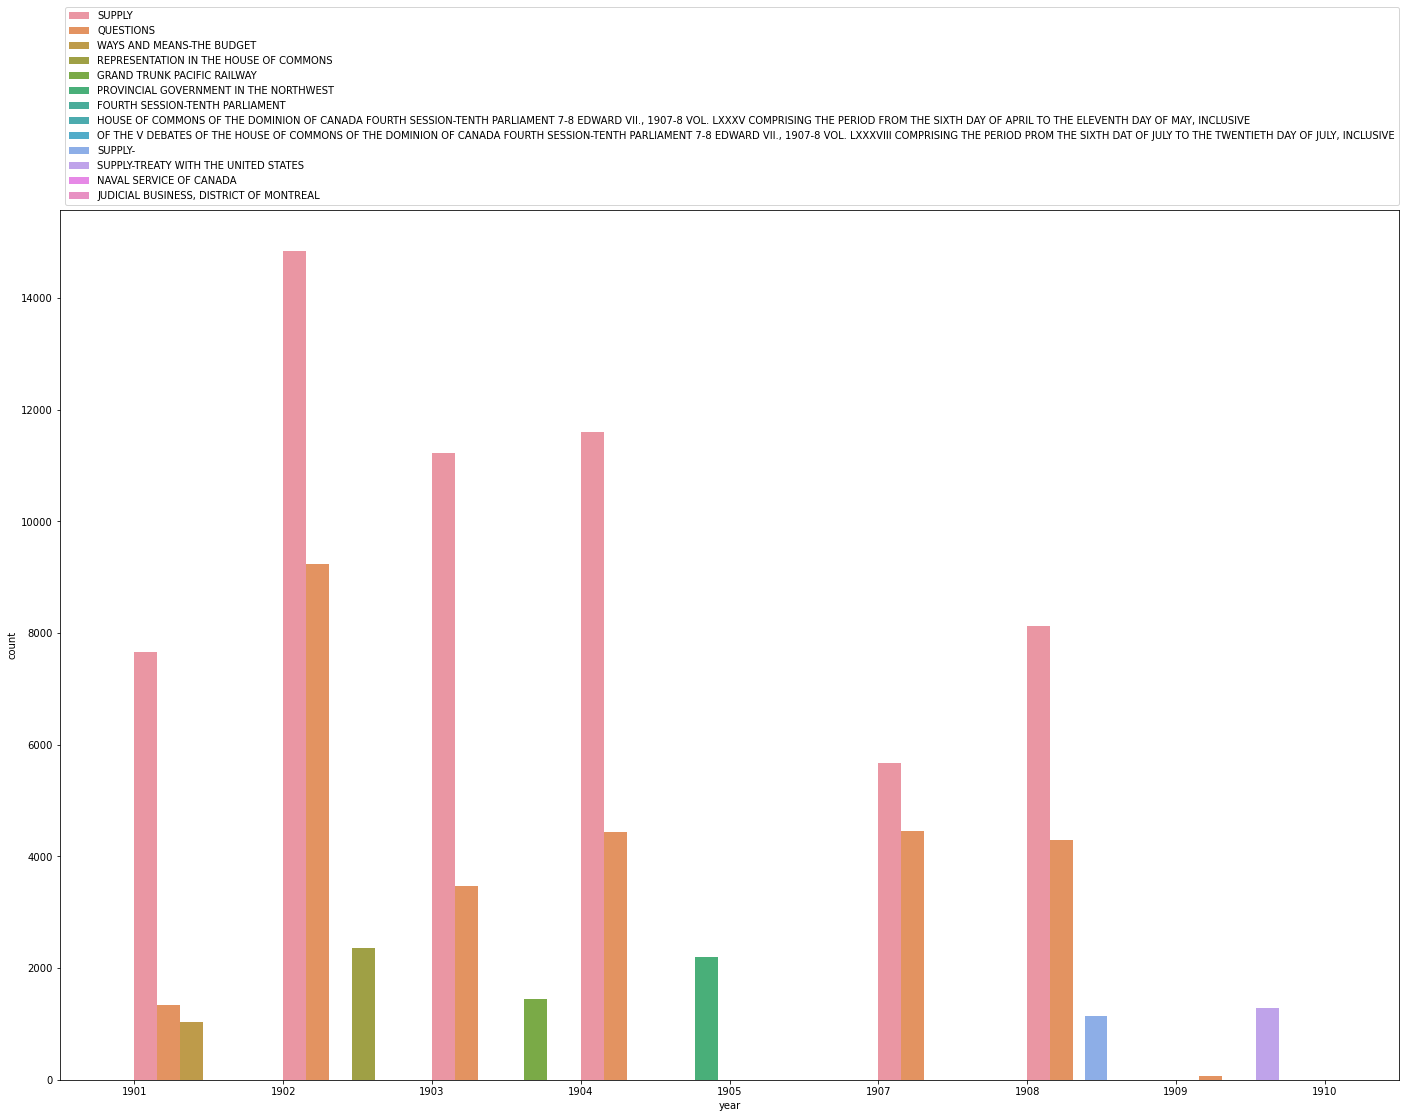

In [17]:
plt.figure(figsize=(24, 16))
sns.barplot(data=df0_top3, x='year', y='count', hue='maintopic',width=2)
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))
plt.show()

#### grouping by 5 years and looking top 3's

In [18]:
def group_dfs(df):
    df_group=df.groupby([df['Year']//5,'maintopic']).count()[['basepk']].reset_index()
    df_group['Year']=df_group['Year'] * 5
    years=df_group['Year'].unique()
    df_group=top3(years,df_group)
    df_group.rename(columns={'basepk':'count'},inplace=True)
    df_group['count'] = df_group['count'].astype(int)
    df_group=df_group.reset_index().drop(columns='index')
    return df_group

In [19]:
groupped_df = pd.DataFrame()
for df in DFS:
    groupped_df = pd.concat([groupped_df,group_dfs(df)])

In [20]:
groupped_df

,count,maintopic,year
0,39553,SUPPLY,1900
1,16231,QUESTIONS,1900
2,3120,WAYS AND MEANS-THE BUDGET,1900
3,25393,SUPPLY,1905
4,13183,QUESTIONS,1905
5,2206,PROVINCIAL GOVERNMENT IN THE NORTHWEST,1905
6,71,QUESTIONS,1910
7,21,NAVAL SERVICE OF CANADA,1910
8,9,"JUDICIAL BUSINESS, DISTRICT OF MONTREAL",1910
0,33374,SUPPLY,1910


In [20]:

def top3(years,df):
    df_new=pd.DataFrame()
    for year in years:
        df_temp = df[df['year']==year].nlargest(3,'count')[['count','maintopic']]
        df_temp['year']=year                                          
        df_new = pd.concat([df_new,df_temp])
    return df_new


In [21]:
years = groupped_df.year
groupped_df=top3(years,groupped_df)

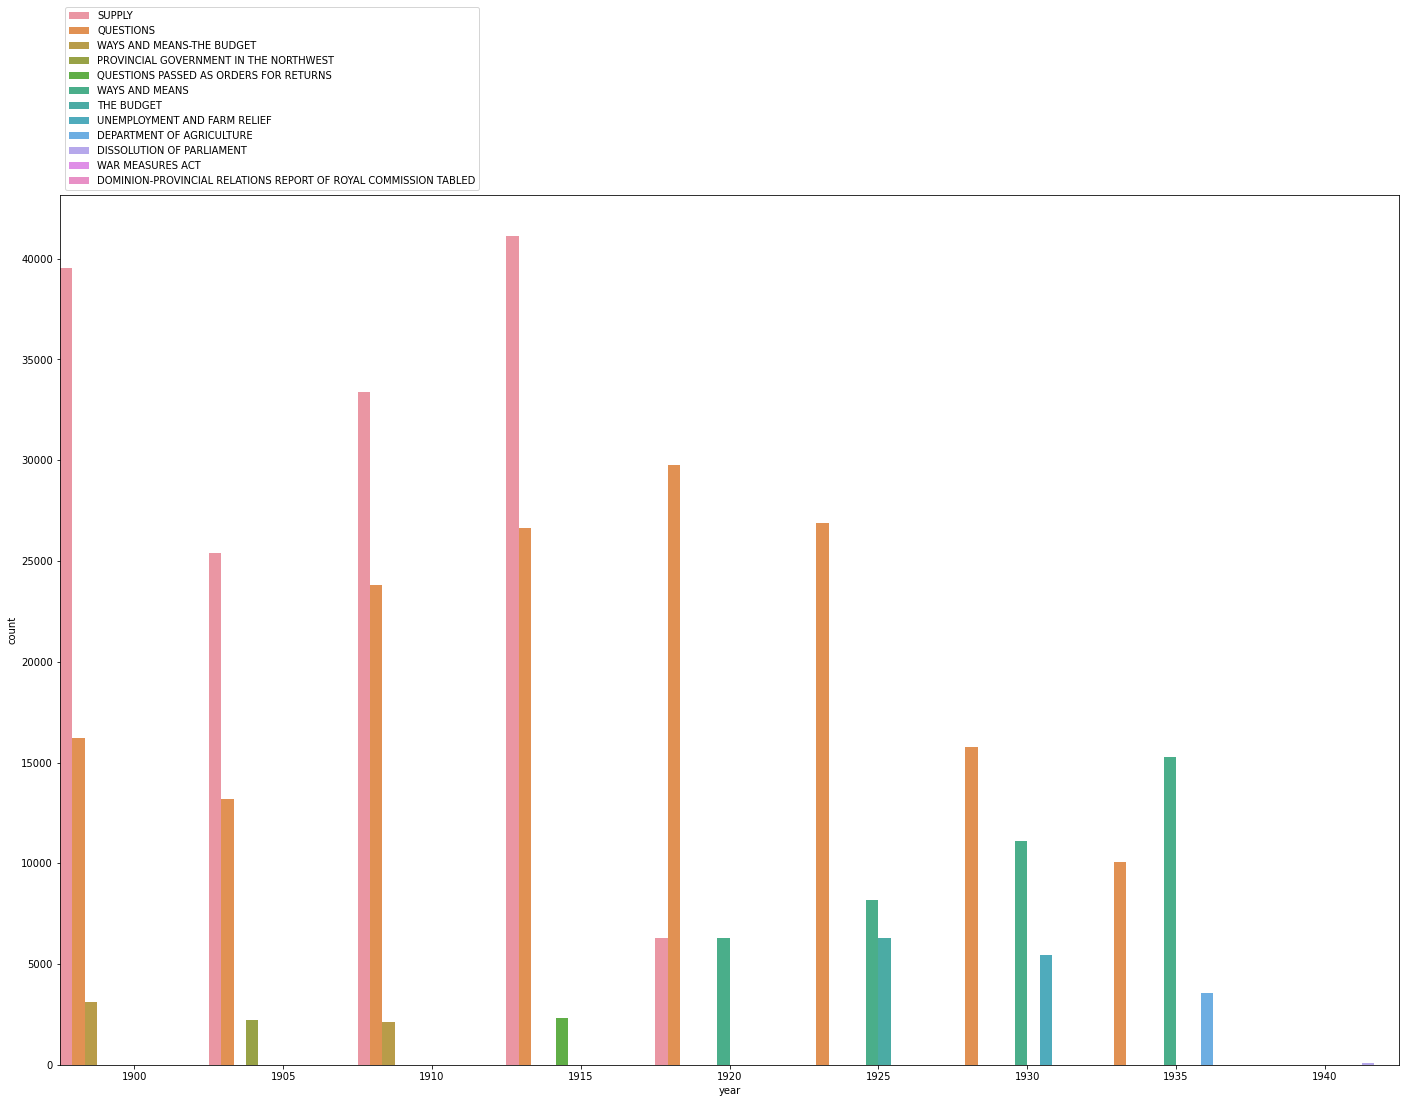

In [22]:
plt.figure(figsize=(24, 16))
sns.barplot(data=groupped_df, x='year', y='count', hue='maintopic',width=1)
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))
plt.show()

#### SUB TOPICS

In [24]:
df0[df0['maintopic']=='SUPPLY'].groupby('subtopic').count().sort_values('basepk',ascending=False)[['basepk']].nlargest(20,'basepk')

,basepk
subtopic,
MAT 5. 1902,669
"$8,000.",664
EDITION,633
190S,539
C43 COMMONS,517
LIST OF BRANDS OF CEMENT USED BY THE PUBLIC WORKS DEPARTMENT DURING THE FISCAL YEAR 1907-1908.,497
"$71,727.2G.",493
REVISEJ1D EDITION COMMONS,492
FEBKUARY 25. 1902,488


#### NLP (most used words and topics)

In [25]:
df_nlp = df_full.copy()

In [26]:
df_nlp=df_nlp.dropna(subset=['speechtext'])

In [27]:
df_nlp=df_nlp[['basepk','Year','maintopic','subtopic','speechtext','speakerparty','speakername']]

##### preprocess speech

* this process takes time, so if there is a pre constructed csv file, I will jump these parts

In [28]:
try: 
    df_nlp = pd.read_csv('cleaned_df_nlp.csv')
    JUMP_clean = True
except:    
    JUMP_clean = False

In [29]:
import re

In [30]:
def clean_text(text):
    # patterns to be replaced
    patterns_space = [r'\r\n', r'\r', r'\n', r'\\ar', r'\s+', r'\n', r';']
    patterns_empstr = [r"'", r',']

    pattern_space = '|'.join(patterns_space)
    pattern_empstr = '|'.join(patterns_empstr)
    
    
    cleaned_text = re.sub(pattern_space, ' ', text)
    
    cleaned_text = re.sub(pattern_empstr, '', cleaned_text)
    
    
    cleaned_text = cleaned_text.strip()
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text.lower())
    
    return cleaned_text

In [31]:
if not JUMP_clean:
    df_nlp['speechtext'] = df_nlp.apply(lambda df_nlp: clean_text(df_nlp['speechtext']),axis=1)
    df_nlp.to_csv('cleaned_df_nlp.csv')

##### stop words

* this process takes time, so if there is a pre constructed csv file, I will jump these parts

In [32]:
try: 
    df_nlp = pd.read_csv('removed_stopwords.csv')
    JUMP_stopwords = True
except:    
    JUMP_stopwords = False

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/batuhan_mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/batuhan_mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [268]:
# by experience, from the results
stop_words = set(stopwords.words('english'))
stop_words.update(['would', 'mr', 'hon', 'speaker'])

In [36]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if (word not in stop_words and len(word) > 1)]
    return ' '.join(filtered_words)

In [37]:
if not JUMP_stopwords:
    df_nlp['speechtext'] = df_nlp.apply(lambda df_nlp: remove_stopwords(df_nlp['speechtext']),axis=1)
    df_nlp.to_csv("removed_stopwords.csv")

* removing verbs

In [ ]:
try: 
    df_nlp = pd.read_csv('removed_verbs.csv')
    JUMP_removeverbs = True
except:    
    JUMP_removeverbs = False

In [269]:
from nltk.tag import pos_tag

In [270]:
def remove_verbs(text):

    words = word_tokenize(text)
    
    tagged_words = pos_tag(words)
    
    non_verbs = [word for word, tag in tagged_words if not tag.startswith('VB')]
    
    cleaned_text = ' '.join(non_verbs)
    
    return cleaned_text

In [ ]:
if not JUMP_stopwords:
    df_nlp['speechtext'] = df_nlp.apply(lambda df_nlp: remove_verbs(df_nlp['speechtext']),axis=1)
    df_nlp.to_csv("removed_verbs.csv")

##### frequency of words

* lets calculate the top 10 words for 5 years periods

In [38]:
try:
    pd.read_csv('frequency_df.csv')
    JUMP_frequency = True
except:
    JUMP_frequency = False

In [39]:
def concatenate_strings(speeches):
    return ' '.join(speeches)

In [40]:
df_nlp=df_nlp.dropna(subset=['speechtext'])

In [41]:
df_nlp_groupped=df_nlp.groupby([df_nlp['Year']//5])['speechtext'].agg(concatenate_strings).reset_index()
df_nlp_groupped['Year']=df_nlp_groupped['Year'] * 5

In [42]:
df_nlp_groupped

,Year,speechtext
0,1900,speaker orders day arc called wish ask attenti...
1,1905,printed dawson printer kings excellent majesty...
2,1910,railway statistics canada year geo graham civi...
3,1915,bill respecting alberta central railway compan...
4,1920,pages volume ii pages pages volume iv pages pa...
5,1925,report department health fecal year ended marc...
6,1930,printer kings excellent majesty commons befaat...
7,1935,house commons debates thursday january parliam...
8,1940,itouge commons debates thursday january parlia...


In [43]:
from collections import Counter


In [44]:
def word_counter(speechtext):
    
    words = word_tokenize(speechtext)
      
    word_freq = Counter(words)
    
    return word_freq.most_common(10)

In [45]:
if not JUMP_frequency:
    tqdm.pandas()  
    df_nlp_groupped['most_used_words']=df_nlp_groupped.apply(lambda df_nlp_groupped: word_counter(df_nlp_groupped['speechtext']),axis=1)
    df_nlp_groupped[['Year','most_used_words']].to_csv('frequency_df.csv')

In [76]:
df_nlp_groupped[['Year','most_used_words']]

,Year,most_used_words
0,1900,"[(government, 54206), (minister, 48756), (com,..."
1,1905,"[(minister, 36785), (government, 33338), (com,..."
2,1910,"[(minister, 46355), (government, 46245), (hous..."
3,1915,"[(government, 65935), (minister, 51074), (cana..."
4,1920,"[(government, 63540), (minister, 54245), (one,..."
5,1925,"[(government, 57232), (minister, 53234), (hous..."
6,1930,"[(minister, 60102), (government, 56998), (one,..."
7,1935,"[(minister, 56406), (government, 54442), (cana..."
8,1940,"[(house, 164), (parliament, 133), (government,..."


In [83]:
pd.concat([df_nlp_groupped[['Year']],df_nlp_groupped['most_used_words'].apply(pd.Series)],axis=1)

,Year,0,1,2,3,4,5,6,7,8,9
0,1900,"(government, 54206)","(minister, 48756)","(com, 42633)","(railway, 42593)","(one, 38605)","(country, 36946)","(house, 36440)","(gentleman, 34479)","(sup, 32778)","(made, 32659)"
1,1905,"(minister, 36785)","(government, 33338)","(com, 32841)","(one, 27479)","(house, 26877)","(sup, 25971)","(think, 22170)","(made, 22165)","(time, 20849)","(ques, 20617)"
2,1910,"(minister, 46355)","(government, 46245)","(house, 34530)","(canada, 34213)","(one, 33995)","(friend, 29615)","(railway, 29248)","(made, 28687)","(time, 27155)","(think, 27142)"
3,1915,"(government, 65935)","(minister, 51074)","(canada, 43458)","(one, 42128)","(house, 38710)","(country, 38042)","(time, 34755)","(made, 33956)","(think, 32334)","(war, 31762)"
4,1920,"(government, 63540)","(minister, 54245)","(one, 47190)","(canada, 44147)","(house, 42759)","(country, 41610)","(think, 41015)","(time, 38342)","(see, 35632)","(act, 34074)"
5,1925,"(government, 57232)","(minister, 53234)","(house, 45194)","(canada, 43677)","(one, 42691)","(country, 36107)","(think, 33752)","(time, 33546)","(made, 33123)","(member, 30853)"
6,1930,"(minister, 60102)","(government, 56998)","(one, 45239)","(canada, 41677)","(house, 40247)","(may, 37630)","(made, 37249)","(time, 36134)","(member, 35724)","(say, 31879)"
7,1935,"(minister, 56406)","(government, 54442)","(canada, 47903)","(one, 47272)","(time, 37787)","(made, 37242)","(may, 36995)","(house, 33929)","(member, 32329)","(say, 31497)"
8,1940,"(house, 164)","(parliament, 133)","(government, 127)","(war, 120)","(time, 99)","(minister, 92)","(country, 88)","(speaker, 80)","(right, 78)","(people, 77)"


#### Sentiment Analysis for these timespans 

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/batuhan_mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
sia = SentimentIntensityAnalyzer()

In [48]:
df_sia=pd.read_csv("removed_stopwords.csv").dropna(subset=['speechtext'])[['Year','speechtext']]

In [49]:
def sia_score(speech):
    return sia.polarity_scores(speech)

* I will use sampling because the data is huge
* And need to check that if every year has that much instances --> 1907 and 1906 has lots of na's. And 1940 also has only 153 instances.

In [50]:
df_sia_groupped=df_sia.groupby('Year').count()
useless_years=df_sia_groupped[df_sia_groupped['speechtext']<10000].reset_index()['Year']
df_sia=df_sia[~df_sia['Year'].isin(useless_years)]

In [302]:
sample_size = 10000 # 

# Group by year and sample
sampled_data = []
for year, group in df_sia.groupby('Year'):
    sampled_group = group.sample(n=min(sample_size, len(group)), random_state=12)
    sampled_data.append(sampled_group)

sampled_df = pd.concat(sampled_data, ignore_index=True)

In [317]:
try:
    sampled_df = pd.read_csv('sampled_df.csv')
    JUMP_sia = True
except:
    JUMP_sia = False

In [318]:
if not JUMP_sia:
    sampled_df['cia_score'] = sampled_df.apply(lambda sampled_df :sia_score(sampled_df['speechtext']),axis=1)
    sampled_df=pd.concat([sampled_df[['Year']],sampled_df['cia_score'].apply(pd.Series)],axis=1)
    sampled_df_grouped=sampled_df.groupby('Year').mean().reset_index()
    sampled_df_grouped.to_csv('sampled_df.csv')

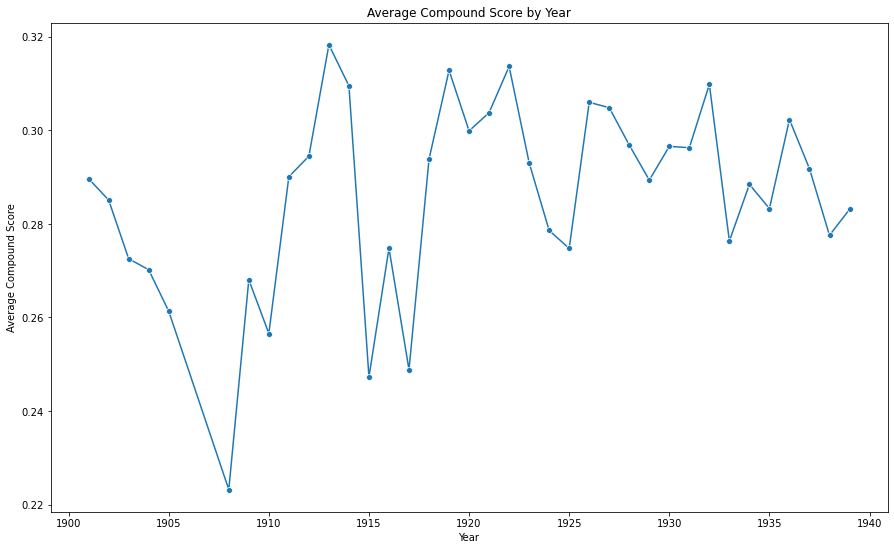

In [311]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=sampled_df_grouped,x='Year',y='compound',marker='o')

plt.title('Average Compound Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Compound Score')

plt.show()

## QUESTION 2
*     What is the prime minister talking about? What the opposition?

In [214]:
years = list(range(1900, 2020, 10))

In [53]:
def primes(year):
    path = f"speeches/Speeches_{year}.csv"
    df = pd.read_csv(path)
    df=df.dropna(subset=['speakerposition'])
    return df[df['speakerposition'].str.contains('prime minister', case=False)]

In [54]:
df_primes = pd.DataFrame()
for year in years:
    df_primes = pd.concat([df_primes,primes(year)],axis=0)

/var/folders/wz/8dx1hr751n3cqyl25t_3q4240000gn/T/ipykernel_2335/2172855812.py:3: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  df_primes = pd.concat([df_primes,primes(year)],axis=0)
/var/folders/wz/8dx1hr751n3cqyl25t_3q4240000gn/T/ipykernel_2335/2172855812.py:3: DtypeWarning: Columns (4,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  df_primes = pd.concat([df_primes,primes(year)],axis=0)
/var/folders/wz/8dx1hr751n3cqyl25t_3q4240000gn/T/ipykernel_2335/2172855812.py:3: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  df_primes = pd.concat([df_primes,primes(year)],axis=0)


In [55]:
df_primes['speakerposition'].unique()[:5]

array(['Prime Minister; President of the Privy Council',
       'Prime Minister; Minister of the Interior; Superintendent-General of Indian Affairs; President of the Privy Council',
       'Prime Minister; Secretary of State for External Affairs; President of the Privy Council',
       'Prime Minister; Secretary of State for External Affairs',
       'Prime Minister; President of the Privy Council; Secretary of State for External Affairs'],
      dtype=object)

In [56]:
df_primes=df_primes[df_primes['speakerposition']=='Prime Minister']

* cleaning the dot at the end the string

In [57]:
df_primes['maintopic'] = df_primes.apply(lambda df_primes: no_dots(df_primes['maintopic']),axis=1)

In [58]:
topics(df_primes)

,count
maintopic,
ORAL QUESTION PERIOD,18707
EXTERNAL AFFAIRS,1413
ROUTINE PROCEEDINGS,930
GOVERNMENT ORDERS,885
BUSINESS OF THE HOUSE,785
...,...
MANIWAKI-FEDERAL ASSISTANCE TO VICTIMS,1
MANITOBA-FINANCIAL ASSISTANCE TO THOSE AFFECTED,1
MANITOBA CENTENNIAL,1


In [59]:
years_prime=df_primes['Year'].unique()

In [60]:
def top3(years,df):
    df_new=pd.DataFrame()
    for year in years:
        
        try:
            df_temp = df[df['Year']==year].nlargest(3,'basepk')[['basepk','maintopic']]
            df_temp['year']=year                                          
            df_new = pd.concat([df_new,df_temp])
            
        except Exception as e:
            print(f"An exception occurred for year {year}: {e}")
            
    return df_new

In [61]:
df0_group=df0.groupby(['Year','maintopic']).count()[['basepk']].reset_index()

In [62]:
df_q2=top3(years_prime,df_primes.groupby(['Year','maintopic']).count()[['basepk']].reset_index()).rename(columns={'basepk':'count'})

In [64]:
df_q2

,count,maintopic,year
45,29,EXTERNAL AFFAIRS,1957
54,28,HEALTH INSURANCE,1957
72,23,NATIONAL DEFENCE,1957
207,133,EXTERNAL AFFAIRS,1958
159,121,BUSINESS OF THE HOUSE,1958
...,...,...,...
4474,27,GOVERNMENT ORDERS,1992
4476,7,ORAL QUESTIONS,1992
4478,309,ORAL QUESTION PERIOD,1993
4477,9,HOUSE OF COMMONS PAGES,1993


* Year based, most used words, topic modeling

In [256]:
df_primes=df_primes.dropna(subset=['speechtext'])

In [259]:
df_primes_groupped=df_primes[['speechtext','Year']].groupby('Year')['speechtext'].agg(concatenate_strings).reset_index()

In [260]:
df_primes_groupped['speechtext'] = df_primes_groupped.apply(lambda df_primes_groupped: clean_text(df_primes_groupped['speechtext']),axis=1)

In [262]:
df_primes_groupped['speechtext'] = df_primes_groupped.apply(lambda df_primes_groupped: remove_stopwords(df_primes_groupped['speechtext']),axis=1)

In [272]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/batuhan_mac/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [273]:
df_primes_groupped['speechtext'] = df_primes_groupped.apply(lambda df_primes_groupped: remove_verbs(df_primes_groupped['speechtext']),axis=1)

In [274]:
df_primes_groupped['most_used_words']=df_primes_groupped.apply(lambda df_primes_groupped: word_counter(df_primes_groupped['speechtext']),axis=1)
    

In [275]:
pd.concat([df_primes_groupped[['Year']],df_primes_groupped['most_used_words'].apply(pd.Series)],axis=1)

,Year,0,1,2,3,4,5,6,7,8,9
0,1957,"(speaker, 288)","(government, 214)","(house, 196)","(question, 152)","(time, 139)","(one, 134)","(member, 120)","(matter, 120)","(parliament, 110)","(united, 98)"
1,1958,"(government, 650)","(house, 648)","(one, 482)","(time, 471)","(united, 467)","(speaker, 428)","(question, 383)","(states, 352)","(member, 338)","(matter, 337)"
2,1959,"(house, 339)","(government, 304)","(speaker, 271)","(question, 264)","(member, 244)","(one, 233)","(gentleman, 228)","(united, 220)","(defence, 219)","(time, 214)"
3,1960,"(house, 959)","(government, 716)","(one, 606)","(speaker, 603)","(time, 569)","(member, 545)","(question, 524)","(canada, 459)","(gentleman, 451)","(may, 432)"
4,1961,"(house, 613)","(government, 597)","(speaker, 551)","(question, 428)","(time, 410)","(one, 407)","(member, 402)","(united, 401)","(minister, 327)","(gentleman, 322)"
5,1962,"(house, 534)","(government, 534)","(speaker, 462)","(time, 340)","(question, 308)","(one, 307)","(canada, 289)","(canadian, 284)","(opposition, 257)","(member, 256)"
6,1963,"(government, 834)","(speaker, 773)","(house, 519)","(matter, 443)","(question, 322)","(canadian, 279)","(right, 278)","(time, 271)","(minister, 270)","(committee, 266)"
7,1964,"(speaker, 1428)","(house, 862)","(government, 779)","(matter, 759)","(question, 477)","(right, 434)","(time, 420)","(flag, 403)","(canadian, 392)","(one, 386)"
8,1965,"(speaker, 766)","(house, 468)","(government, 383)","(matter, 358)","(question, 314)","(time, 265)","(members, 235)","(committee, 211)","(right, 210)","(may, 203)"
9,1966,"(speaker, 1056)","(government, 782)","(matter, 606)","(house, 505)","(minister, 387)","(question, 355)","(time, 324)","(one, 287)","(right, 285)","(committee, 253)"


##### Sentiment for the president

In [276]:
from nltk.probability import FreqDist

In [281]:
df_primes['cia_score'] = df_primes.apply(lambda df_primes :sia_score(df_primes['speechtext']),axis=1)

/var/folders/wz/8dx1hr751n3cqyl25t_3q4240000gn/T/ipykernel_2335/225133544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primes['cia_score'] = df_primes.apply(lambda df_primes :sia_score(df_primes['speechtext']),axis=1)


In [283]:
df_primes[['speechtext','speakername','Year','cia_score']]

,speechtext,speakername,Year,cia_score
296644,"Mr. Raymond, what is uppermost in the minds of...",John George Diefenbaker,1957,"{'neg': 0.038, 'neu': 0.84, 'pos': 0.122, 'com..."
296650,"Mr. Speaker, might I suggest that the sitting ...",John George Diefenbaker,1957,"{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'comp..."
296656,"for leave to introduce Bill No. 1, respecting ...",John George Diefenbaker,1957,"{'neg': 0.123, 'neu': 0.686, 'pos': 0.191, 'co..."
296664,"Mr. Speaker, may I\r\nsuggest that in putting ...",John George Diefenbaker,1957,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp..."
296669,"That Henri Courtemanche, Esquire, member for t...",John George Diefenbaker,1957,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp..."
...,...,...,...,...
143347,"No, Madam Speaker, and I can understand why th...",Martin Brian Mulroney,1993,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp..."
143349,I will be gentle. The NDP leader Duchesne said...,Martin Brian Mulroney,1993,"{'neg': 0.069, 'neu': 0.735, 'pos': 0.197, 'co..."
143380,"Madam Speaker, I have not read the report to w...",Martin Brian Mulroney,1993,"{'neg': 0.055, 'neu': 0.774, 'pos': 0.172, 'co..."
143382,"Madam Speaker, I ask my socialist friend how w...",Martin Brian Mulroney,1993,"{'neg': 0.057, 'neu': 0.689, 'pos': 0.254, 'co..."


In [284]:
df_primes_groupped=pd.concat([df_primes[['Year','speakername']],df_primes['cia_score'].apply(pd.Series)],axis=1)
df_primes_groupped=df_primes_groupped.groupby(['Year','speakername']).mean().reset_index()

In [285]:
df_primes_groupped

,Year,speakername,neg,neu,pos,compound
0,1957,John George Diefenbaker,0.043664,0.864865,0.089208,0.310305
1,1958,John George Diefenbaker,0.045378,0.857888,0.096745,0.327095
2,1959,John George Diefenbaker,0.040486,0.864091,0.095395,0.286500
3,1960,John George Diefenbaker,0.046838,0.862545,0.090611,0.261830
4,1961,John George Diefenbaker,0.042347,0.877524,0.080143,0.272796
5,1962,John George Diefenbaker,0.043971,0.873089,0.082941,0.291384
6,1963,Lester Bowles Pearson,0.044986,0.842185,0.112819,0.328649
7,1964,Lester Bowles Pearson,0.042126,0.837133,0.120274,0.370337
8,1965,Lester Bowles Pearson,0.033535,0.837639,0.128816,0.428828
9,1966,Lester Bowles Pearson,0.038842,0.839336,0.121812,0.382325


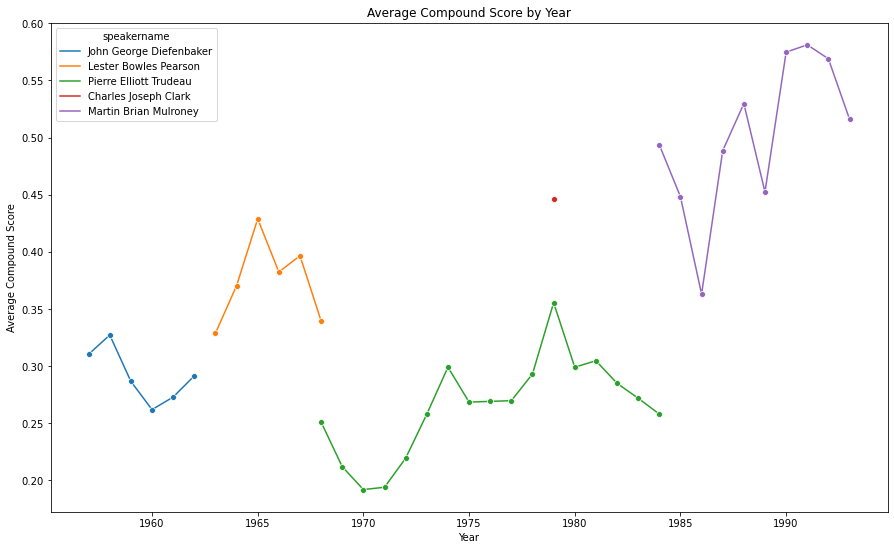

In [286]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=df_primes_groupped,x='Year',y='compound',hue='speakername',marker='o')

plt.title('Average Compound Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Compound Score')

plt.show()

## QUESTION 3
*      Is there a correlation between electoral performance and the most frequently talked about topic of each Parliamentarian?

In [512]:
fed_results=pd.read_csv('data/FED_Results.csv', delimiter=';')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (94,95,98,99,100,103,104,105,108,109,110,113,114,115,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [69]:
#df_electoral = pd.read_csv('electoral_data.csv').drop(columns=['Unnamed: 0'])

In [329]:
df_electoral=pd.concat([pd.read_csv('electoral_backup.csv').drop(columns=['Unnamed: 0']),
pd.read_csv('electoral_backup2.csv').drop(columns=['Unnamed: 0']),
pd.read_csv('electoral_backup3.csv').drop(columns=['Unnamed: 0']),
pd.read_csv('electoral_data.csv').drop(columns=['Unnamed: 0']),
pd.read_csv('electoral_backup5.csv').drop(columns=['Unnamed: 0'])]).reset_index().drop(columns='index')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


* I need to have election dates

In [330]:
election_dates=df_electoral['Election Date'].unique()

In [331]:
elec_temp=election_dates[1]

In [332]:
import datetime

In [333]:
def before_X_days(election_date, days_before):
    
    election_date = datetime.datetime.strptime(election_date, "%Y-%m-%d")
    before_date = election_date - datetime.timedelta(days=days_before)    
    return str(before_date)[:10]

In [334]:
def related_speech(speech_date, election_date):
    if election_date >= speech_date >= before_X_days(election_date, 30):
        return True
    else:
        return False  

In [335]:
election_years = [(int(election_date[:4])//10 * 10, election_date) for election_date in election_dates]

In [336]:
grouped_years = {}

for year, date in election_years:
    if year not in grouped_years:
        grouped_years[year] = []
    grouped_years[year].append(date)

grouped_years = {year: dates for year, dates in grouped_years.items()}

In [337]:
del grouped_years[2020]
grouped_years = {year: date for year, date in grouped_years.items() if year >= 1900}

In [338]:
grouped_years

{2010: ['2019-10-21', '2015-10-19', '2011-05-02'],
 2000: ['2008-10-14', '2006-01-23', '2004-06-28', '2000-11-27'],
 1940: ['1940-03-26', '1949-06-27', '1945-06-11'],
 1910: ['1917-12-17', '1911-09-21'],
 1900: ['1900-11-07', '1908-10-26', '1904-11-03', '1902-12-02'],
 1960: ['1962-06-18', '1968-06-25', '1965-11-08', '1963-04-08'],
 1950: ['1958-03-31', '1957-06-10', '1953-08-10'],
 1930: ['1935-10-14', '1930-07-28'],
 1980: ['1984-09-04', '1988-11-21', '1980-02-18'],
 1990: ['1993-10-25', '1997-06-02', '1996-03-25', '1998-03-30', '1999-11-15'],
 1970: ['1979-05-22', '1974-07-08', '1972-10-30'],
 1920: ['1926-09-14', '1925-10-29', '1921-12-06']}

In [339]:
def find_all_related_speeches(grouped_years):
   
    df_election_speeches = pd.DataFrame()

    for election_year, election_dates in tqdm(grouped_years.items()):
            path = f"speeches/Speeches_{election_year}.csv"
            df = pd.read_csv(path)
            for election_date in election_dates:
                temp_df=df[df['speechdate'].apply(lambda speech_date: related_speech(speech_date, before_X_days(election_date, 30)))]
                temp_df['election_date'] = election_date
                
                df_election_speeches = pd.concat([df_election_speeches,temp_df])
                
                
    return df_election_speeches

In [340]:
import warnings
warnings.filterwarnings("ignore")
df_X=find_all_related_speeches(grouped_years)
warnings.resetwarnings()

100%|███████████████████████████████████████████| 12/12 [03:23<00:00, 16.95s/it]


In [341]:
def remove_letter_dot(text):
    
    pattern = r'[A-Za-z]\.|[^\w\s]'

    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

In [342]:
def remove_titles(text):
    titles_to_remove = ["The Hon.","M.", "Mr.", "Mrs.", "Dr.", "Ms.", "Prof."]
    
    pattern = r'\b(?:' + '|'.join(map(re.escape, titles_to_remove)) + r')\.?\s'
    
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

In [343]:
def remove_unnecessary_words(resiudal_name):
    return remove_letter_dot(remove_titles(resiudal_name)).strip()

In [344]:
df_electoral['cleaned_name']=df_electoral.apply(lambda df_electoral: remove_unnecessary_words(df_electoral['name']), axis=1)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


In [345]:
def merge_electoral_speech(df_X,df_electoral):
    df_electoral.merge(df_X,left_on=['cleaned_name','Election Date'],right_on=['speakername','election_date'])[['Election Date','Result','maintopic','name']]

In [346]:
df_topic_result=df_electoral.merge(df_X,left_on=['cleaned_name','Election Date'],right_on=['speakername','election_date'])[['Election Date','speechdate','Result','maintopic','name']]

In [347]:
df_topic_result[['maintopic','Result']]

,maintopic,Result
0,Oral Questions,Defeated
1,Statements by Members,Defeated
2,PRIVILEGE,Elected
3,PRIVILEGE,Elected
4,PRIVILEGE,Elected
...,...,...
405,Statements By Members,Elected
406,DEPARTMENT OF AGRICULTURE,Elected
407,DEPARTMENT OF AGRICULTURE,Elected
408,DEPARTMENT OF AGRICULTURE,Elected


In [348]:
df_topic_result['Result'].value_counts()/len(df_topic_result['Result'])

Elected     0.729268
Defeated    0.270732
Name: Result, dtype: float64

In [349]:
df_topic_result=df_topic_result.groupby(['maintopic','Result']).count().rename(columns={'speechdate':'count'})[['count']].sort_values('count',ascending=False).reset_index()


In [363]:
df_topic_result[df_topic_result['maintopic']=='Oral Question Period']

,maintopic,Result,count
1,Oral Question Period,Elected,46
63,Oral Question Period,Defeated,1


In [370]:
df_topic_result

,maintopic,Result,count
0,Government Orders,Elected,80
1,Oral Question Period,Elected,46
2,WAYS AND MEANS - RECIPROCAL TRADE WITH THE UNI...,Elected,43
3,Routine Proceedings,Elected,32
4,DISSOLUTION OF PARLIAMENT,Defeated,13
...,...,...,...
62,"OLYMPIC GAMES-BEN JOHNSON, 100 METRE WINNER",Defeated,1
63,Oral Question Period,Defeated,1
64,PRIVILEGES AND ELECTIONS,Defeated,1
65,PUBLIC WORKS,Defeated,1


In [376]:
df_temp=df_topic_result.groupby('maintopic').sum().reset_index().merge(df_topic_result[df_topic_result['Result']=='Elected'], on='maintopic')

In [352]:
df_topic_result[df_topic_result['Result']=='Elected'].head()

,maintopic,Result,count
0,Government Orders,Elected,80
1,Oral Question Period,Elected,46
2,WAYS AND MEANS - RECIPROCAL TRADE WITH THE UNI...,Elected,43
3,Routine Proceedings,Elected,32
6,PRIVILEGE,Elected,10


In [353]:
df_topic_result[df_topic_result['Result']=='Defeated'].head()

,maintopic,Result,count
4,DISSOLUTION OF PARLIAMENT,Defeated,13
5,GOVERNMENT ORDERS,Defeated,11
7,DEPARTMENT OF CITIZENSHIP AND IMMIGRATION,Defeated,10
10,Government Orders,Defeated,6
13,DEPARTMENT OF MUNITIONS AND SUPPLY,Defeated,6


In [381]:
df_topic_result['count'].sum()

410